### matplotlib: Несколько графиков [Домашнее задание]
> **Вы должны импортировать все необходимые пакеты самостоятельно.**

> **Пишите код только там, где это показано для записи. Не удаляйте комментарии!**
 

### Шаг 1

Пожалуйста, реализуйте функцию ```load_csv(filename)```, которая будет возвращать  спискок ```header``` и ```ndarray``` ```data```.

In [1]:
#Начало вашего кода
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


def load_csv(filename):
    data = pd.read_csv(filename)
    return list(data.columns), data.values
#Конец вашего кода
header,data=load_csv("Social_Network_Ads.csv")
print(header)
print(data)

['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']
[[15624510 'Male' 19 19000 0]
 [15810944 'Male' 35 20000 0]
 [15668575 'Female' 26 43000 0]
 ...
 [15654296 'Female' 50 20000 1]
 [15755018 'Male' 36 33000 0]
 [15594041 'Female' 49 36000 1]]


### Ожидаемый результат:

```
['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']
['15624510', 'Male', '19', '19000', '0']
['15810944', 'Male', '35', '20000', '0']
['15668575', 'Female', '26', '43000', '0']
['15603246', 'Female', '27', '57000', '0']
['15804002', 'Male', '19', '76000', '0']
```

### Шаг 2

Пожалуйста, реализуйте функцию ```preprocess (data, idx)```, которая преобразует элементы столбца ```idx``` в числа. В конце эта функция вернет данные со всеми элементами, преобразованными в ```int```, и словарь ```num2str```, который содержит число в качестве ключа и ```str``` в качестве значения.

**Подсказка: используйте ```ndarray.copy()```, чтобы не потерять исходные данные.**

In [2]:
#Начало вашего кода
def preprocess (data, idx):
    np_data = data.copy()
    unique_data = np.unique(np_data[:,idx])
    num2str = {}
    for count, value in enumerate(unique_data):
        np_data[:,idx][np_data[:,idx] == value] = count
        num2str[count] = value
    return  np_data , num2str
#Конец вашего кода
np_data,num2str=preprocess(data,1)
print(num2str)
print(np_data)

{0: 'Female', 1: 'Male'}
[[15624510 1 19 19000 0]
 [15810944 1 35 20000 0]
 [15668575 0 26 43000 0]
 ...
 [15654296 0 50 20000 1]
 [15755018 1 36 33000 0]
 [15594041 0 49 36000 1]]


### Ожидаемый результат:

```
{0: 'Female', 1: 'Male'}
[[15624510        1       19    19000        0]
 [15810944        1       35    20000        0]
 [15668575        0       26    43000        0]
 ...
 [15654296        0       50    20000        1]
 [15755018        1       36    33000        0]
 [15594041        0       49    36000        1]]
```

### Шаг 3

Пожалуйста, реализуйте функцию  ```statistics(data, idx)```, которая вычисляет базовую статистику для данного столбца ```idx``` в ```ndarray``` ```data```. Функция должна возвращать словарь рассчитанных значений.

In [3]:
#Начало вашего кода
def statistics(data, idx):
    stats = {}
    stats['mean'] = np.mean(data[:, idx])
    stats['std'] = np.std(data[:, idx])
    stats['median'] = np.median(data[:, idx])
    stats['max'] = np.max(data[: , idx])
    stats['min'] = np.min(data[: , idx])
    return stats
#Конец вашего кода
age_stats=statistics(np_data,2)
salary_stats=statistics(np_data,3)

print(age_stats)
print(salary_stats)

{'mean': 37.655, 'std': 10.469764801560734, 'median': 37.0, 'max': 60, 'min': 18}
{'mean': 69742.5, 'std': 34054.3124104716, 'median': 70000.0, 'max': 150000, 'min': 15000}


### Ожидаемый результат:

```
{'mean': 37.655, 'std': 10.46976480156073, 'median': 37.0, 'max': 60, 'min': 18}
{'mean': 69742.5, 'std': 34054.3124104716, 'median': 70000.0, 'max': 150000, 'min': 15000}
```

# Шаг 4

Постройте гистограммы (```histograms```) на основе информации о возрасте и зарплате.

Возрастная гистограмма должна содержать 6 бинов (```bins```), а гистограмма зарплаты должна содержать 9 (```bins```). Пожалуйста, используйте результаты статистики из предыдущего шага, чтобы сгенерировать равные бины.

**Подсказка:** 
* установите размер фигуры в ```(10,5)```, используя ```plt.rcParams["figure.figsize]```
* установите аргумент прозрачности ```0.6```
* Пожалуйста, поверните xticklabels на 45 градусов. ```ax[i].set_xticklabels()```





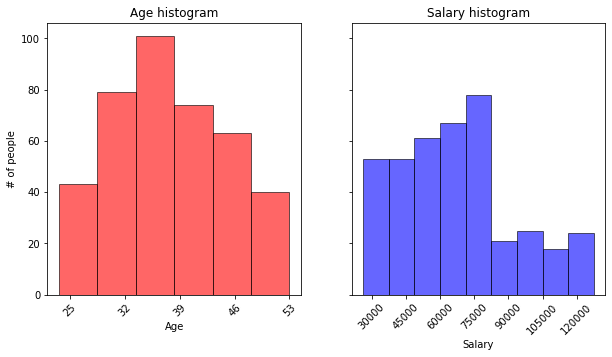

In [12]:
#Начало вашего кода
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.facecolor'] = (1, 1, 1, 0.6)
fig, axs = plt.subplots(1,2, sharey =True)
axs[0].hist(data[:,2], bins = np.linspace(age_stats['min'] , age_stats['max'] , 7) , color = 'r', alpha = 0.6,
           edgecolor = 'k')
axs[0].set_title('Age histogram')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('# of people')
axs[1].hist(data[:,3], bins = np.linspace(salary_stats['min'] , salary_stats['max'] , 10) , color = 'b', alpha = 0.6,
           edgecolor = 'k')
axs[1].set_title('Salary histogram')
axs[1].set_xlabel('Salary')
# axs[0].set_xticks(np.linspace(age_stats['min'] , age_stats['max'] , 7))
# axs[1].set_xticks(np.linspace(salary_stats['min'] , salary_stats['max'] , 10))
axs[0].set_xticklabels(np.linspace(age_stats['min'] , age_stats['max'] , 7,dtype=int) , rotation = 45)
axs[1].set_xticklabels(np.linspace(salary_stats['min'] , salary_stats['max'] , 10,dtype=int), rotation = 45)
plt.show()
#Конец вашего кода

### Ожидаемый результат:

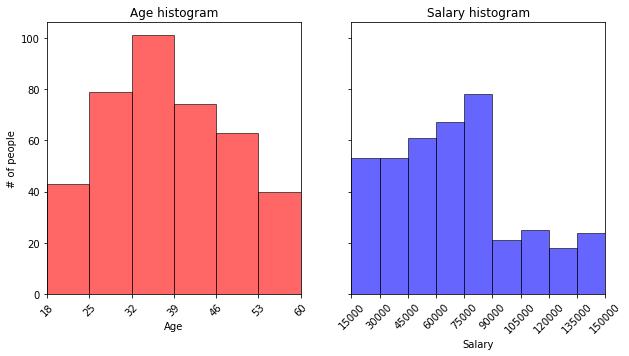


### Шаг 5

Пожалуйста, получите отдельные ```ndarrays``` женщин, которые приобрели, не приобрели, мужчин, которые приобрели, не приобрели продукт, используя логическое индексирование, которое вы изучали в лекциях NumPy. 
Вы должны получить 4 отдельных ```ndarrays```.

In [5]:
#Начало вашего кода
women  = data[data[:, 1] == 'Female']
female_purchased = women[women[:, 4] == 1]
female_notpurchased = women[women[:, 4] == 0]
men  = data[data[:, 1] == 'Male']
male_purchased = men[men[:, 4] == 1]
male_notpurchased = men[men[:, 4] == 0]
#Конец вашего кода

print(female_purchased.shape)
print(female_notpurchased.shape)
print(male_purchased.shape)
print(male_notpurchased.shape)

(77, 5)
(127, 5)
(66, 5)
(130, 5)


### Ожидаемый результат:

```(77, 5)
(127, 5)
(66, 5)
(130, 5)```

### Шаг 5

Используя полученные ```ndarrays``` из предыдущего шага, сделайте следующий график:

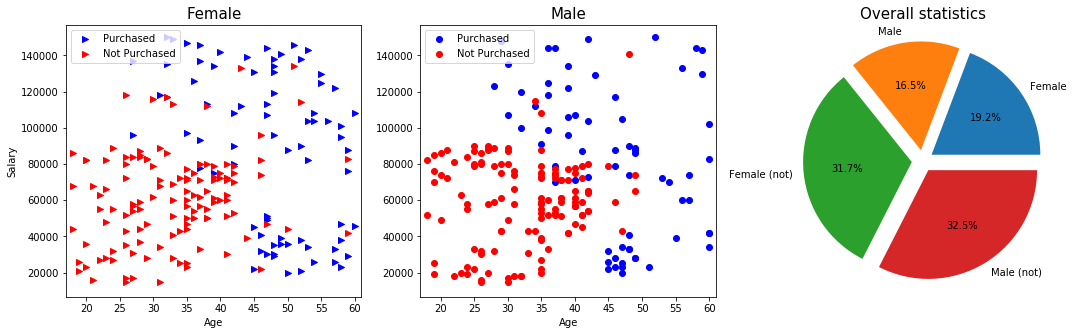


**Подсказка:** 
* установите размер фигуры ```(18,5)```, используя ```plt.rcParams["figure.figsize]```.
* установите размер шрифта ```title``` на ``15``

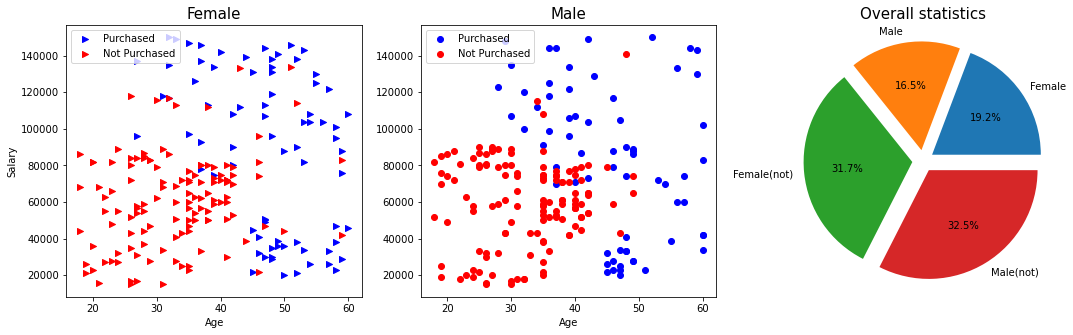

In [6]:
#Начало вашего кода
plt.rcParams['figure.figsize'] = (18,5)
fig , axs = plt.subplots(1,3) # я не написал "sharey = True", потому что у меня пропадали первые два графика
axs[0].set_title('Female', fontsize = 15)
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Salary')
axs[0].scatter(female_purchased[:, 2], female_purchased[:, 3], c = 'b', marker = '>', label = 'Purchased')
axs[0].scatter(female_notpurchased[:, 2] , female_notpurchased[:, 3], c = 'r', marker = '>', label = 'Not Purchased')
axs[0].legend()

axs[1].set_title('Male' , fontsize = 15)
axs[1].set_xlabel('Age')
axs[1].scatter(male_purchased[:,2] , male_purchased[:,3], c = 'b', label = 'Purchased')
axs[1].scatter(male_notpurchased[:,2], male_notpurchased[:,3], c = 'r', label = 'Not Purchased')
axs[1].legend()

axs[2].set_title('Overall statistics', fontsize = 15)
axs[2].pie([female_purchased.shape[0] , male_purchased.shape[0] , female_notpurchased.shape[0] , male_notpurchased.shape[0]],
           autopct = lambda x: f'{x:.1f}%',explode = [0.1,0.1,0.1,0.1], labels = ['Female' , 'Male', 'Female(not)', 'Male(not)'])

plt.show()
#Конец вашего кода

# Прекрасная работа!